# Zillow Clustering Project

Finish the mvp workflow and then go back and think critically about what you might of missed. The point isn't to doubt yourself; the purpose here is to check your blind spots and see if you can't find more information or insights that will help you to deliver better results.

Better yet, and this cannot be stressed enough, don't ask yourself these questions, but bring them up in conversation with peers, experts in other fields, or even complete strangers -- anyone with a different point of view is going to be able to help you to see what things you are taking for granted.

## Description: 
- Zillow: What is driving the errors in the Zestimates?
- The presentation will consist of a notebook demo of the discoveries you made and work you have done related to uncovering what the drivers of the error in the zestimate is.


## Problem Statement
- What is driving the error in the Zestimate (logerror)?
- Are there features that will produce a smaller average error?
- What groups are in the data?
- Does using these groups help remove the noise in the model?

## PLAN

**MVP Questions to answer:**
- Determine the baseline logerror
- Produce a model that has less logerror than baseline
- Determine key drivers of error

**Brainstorm:**    
- MVP all counties
- features to add:
    - county name column, remove fips, get dummies for clustering use
    - combined bedroom/bathroom ratio? drop bathroom, keep bedroom
    - cluster on size with lot size, finished sq ft, and ????
    - convert year build to age (current date - yearbuilt)
    - does age correlate with size? if so maybe cluster age with size columns above
    - cluster on tax value? taxamount, taxvaluedollarcnt, landtaxvaluedollarcnt, structuretaxvaluedollarcnt?
- 2nd run add tax percent rate column and remove outliers above 6.6% and below 1% 
    - first outlier method removed too many observations, this was done instead
    
- 2nd run through seperate models by county?


Audience: Zillow Data Science Team    
Setting: Professional


## Acquire
DELIVERABLES: 
- Data is collected from the Codeup cloud database with an appropriate SQL query
- Define single unit property

Summary of query requirements and creation:



## Preparation
DELIVERABLES:
- Column data types are appropriate for the data they contain
- Missing values are investigated and handled
- Outliers are investigated and handled

Summary of handling nulls, outliers, creating additional features, dropping columns/rows

Data split into X (features) and y (target) dataframes for Train, Validate, and Test
Data for X dataframes scaled for cluster exploration and modeling


(62481, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62481 entries, 0 to 71788
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      62481 non-null  int64  
 1   bathroomcnt                   62481 non-null  float64
 2   bedroomcnt                    62481 non-null  float64
 3   calculatedfinishedsquarefeet  62481 non-null  float64
 4   fullbathcnt                   62481 non-null  float64
 5   latitude                      62481 non-null  float64
 6   longitude                     62481 non-null  float64
 7   lotsizesquarefeet             62481 non-null  float64
 8   rawcensustractandblock        62481 non-null  float64
 9   regionidzip                   62481 non-null  float64
 10  roomcnt                       62481 non-null  float64
 11  unitcnt                       62481 non-null  float64
 12  yearbuilt                     62481 non-null  fl

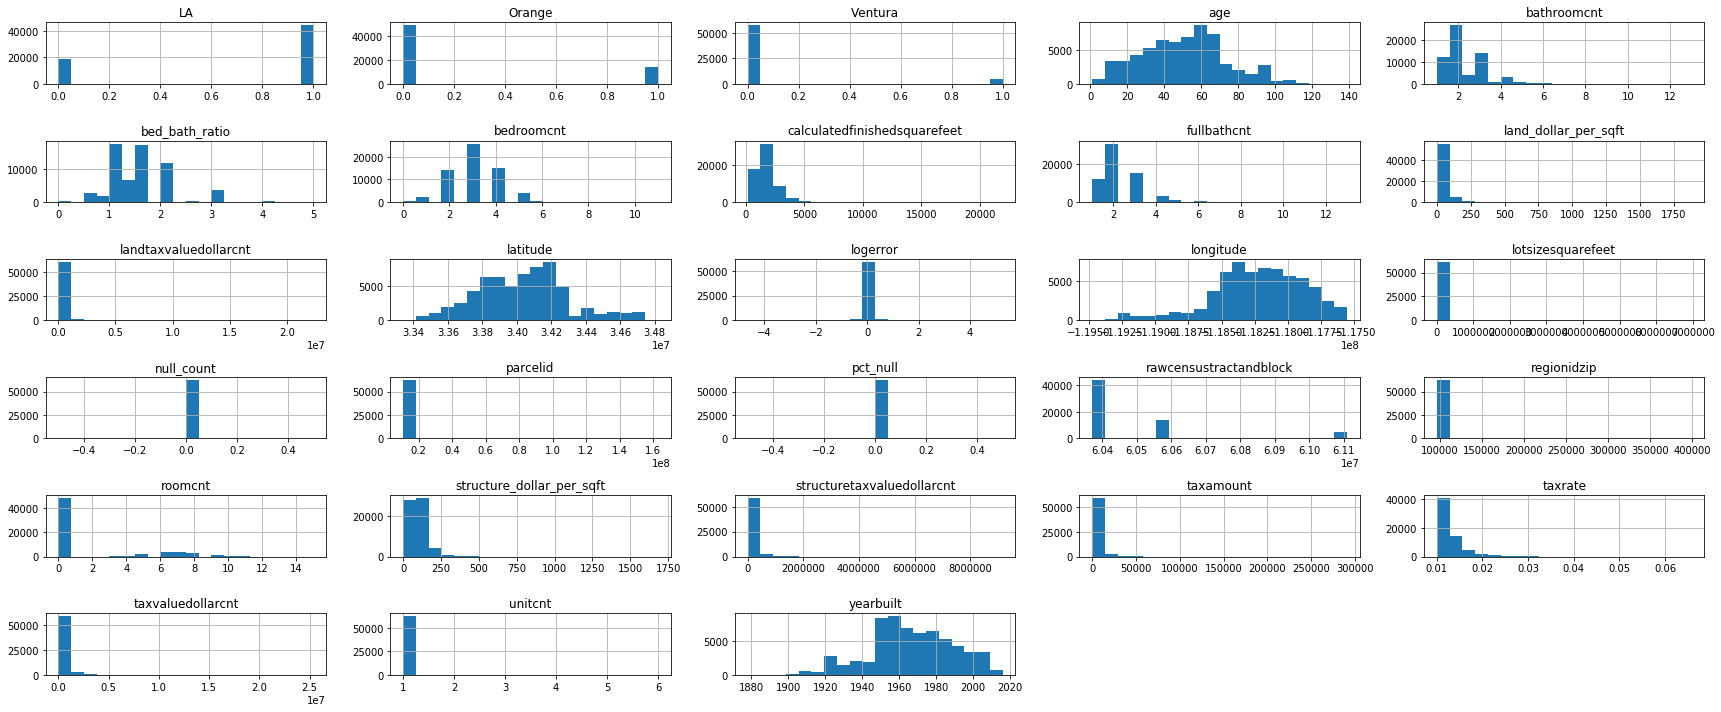

None [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4e929b950>
  <matplotlib.axes._subplots.AxesSubplot object at 0x7fe4cbd2d590>]] None
(34988, 20) (14996, 20) (12497, 20)


In [1]:
import wrangle_zillow
df, X_train, y_train, X_validate, y_validate, X_test, y_test, X_train_scaled, X_validate_scaled, X_test_scaled = wrangle_zillow.wrangle_zillow_cluster()
# this also prints summary data for the full dataset that was used in identifying nulls and outliers
# histograms are produced for full dataset

## Exploration and Pre-Processing Stage
DELIVERABLES: 
- Interaction between independent variables and the target variable is explored using visualization and statistical testing
- Clustering is used to explore the data
- A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful
- At least 3 combinations of features for clustering should be tried

## Modeling Stage
DELIVERABLES: 
- At least 4 different models are created and their performance is compared
- One model is the distinct combination of algorithm, hyperparameters, and features
- Best practices on data splitting are followed

## Delivery Stage
DELIVERABLES:
- [Main_Notebook](xxxxxxx)
- walk through of notebook


Now that you have a clear idea of what you are trying to accomplish, you need to find a data source. Think of this as working through a maze forwards and backwards at the same time. At the start you have any number of data sets available to work with (and the whole Internet to search and scrape), and at the end is the hypothetical data set that would answer your question immediately if you had it.
What data, if you had it, would solve your problem right away?
What data do you have access to?
What additional data would be good to have?
What data would be impossible to collect?
What are the best proxies you can find for unavailable or impossible data?
What are the legal or ethical issues you might run into if you were to try to collect all of the types of data you would like to work with?
Of course you need to make a plan to turn your data into the solutions you need. Think of what type of problem this is, what models are commonly used for those types of problems, what types of data those models require and special considerations that may need to be made. Do your homework and find out what approaches other people are using on similar tasks.
What ML paradigm are you working in? (Classification, Regression, Clustering, etc)
What models are commonly used in this task?
What other solutions are being tried in this field?
What special considerations need to be taken when dealing with these models? (i.e., imbalanced classes, text preprocessing, data leakage, etc)
How will you know that your models work?
How will you recognize and diagnose cases where the predictions are incorrect?

****
Acquire    
**take aways**
1. could fireplace, garage, pool, hottub, deck be made to 0 or 1 then summed as "plus_item" column?
    - this would assume null values do not have the feature, as opposed to feature is present but not noted
2. drop features with 70% or more missing values to start
3. most rows have 32-34 columns with missing values
****

****
Prepare     
**take aways**    

**This is deffinition used in previous project**   

Determine deffinition of single property used article by James Chen Updated Sep 11, 2020 What Is a Housing Unit? "The term housing unit refers to a single unit within a larger structure that can be used by an individual or household to eat, sleep, and live. The unit can be in any type of residence such as a house, apartment, mobile home, or may also be a single unit in a group of rooms. Essentially, a housing unit is deemed to be a separate living quarter where the occupants live and eat separately from other residents of the structure or building. They also have direct access from the building's exterior or through a common hallway."
https://www.investopedia.com/terms/h/housingunits.asp   

**In my opinion deffinition should include condo, townhouse, any unit that can be sold to an individual owner. So my deffinition will include townhouse, condo, ect. but not commercial, business, land only, etc. **   

This site has the property use codes for LA county https://www.titleadvantage.com/mdocs/LA%20County%20Use%20Codes%20nm.pdf   
looking at the common use codes for Duplex, Triplex, and Quadplex these codes indicate the units are multi-family/income properties or retail/store properties so these will be excluded

Identify Properties in the Database: Based on the above definition some categories do not fit brief   
Propertylandusetypeid | propertylandusedesc    
No 31 Commercial/Office/Residential Mixed Used (not a residence)    
No 46 Multi-Story Store (not a residence)   
No 47 Store/Office (Mixed Use) (not a residence)    
No 246 Duplex (2 Units, Any Combination)    
No 247 Triplex (3 Units, Any Combination)   
No 248 Quadruplex (4 Units, Any Combination)   
260 Residential General    
261 Single Family Residential   
262 Rural Residence   
263 Mobile Home   
264 Townhouse   
No 265 Cluster Home    
266 Condominium    
No 267 Cooperative (become shareholder not owner)   
268 Row House       
No 269 Planned Unit Development   
No 270 Residential Common Area (propterty feature)    
No 271 Timeshare (become shareholder not owner)    
273 Bungalow      
274 Zero Lot Line   
275 Manufactured, Modular, Prefabricated Homes   
276 Patio Home    
279 Inferred Single Family Residential      
No 290 Vacant Land - General (not a residence)   
No 291 Residential Vacant Land (not a residence)   

So we will keep only those where propertylandusetypeid = ('260', '261', '262', '263', '264', '266', '268', '273', '274', '275', '276', '279')  

**acquire function updated to filter only for these**
new shape = (71789, 70)
****

For the columns to remove we will send known duplicate columns in this first pass   
- id
- id.1
- pid
- tdate

3. Decide how to handle the remaining missing values:

Fill with constant value.

Impute with mean, median, mode.

Drop row/column

**wrangle_zillow.py**

Functions of the work above needed to acquire and prepare a new sample of data.

summary of remaining nulls and how to handle
parcelid                            0    
propertylandusetypeid               0    
heatingorsystemtypeid           25029  DROP column.   
bathroomcnt                         0    
bedroomcnt                          0    
buildingqualitytypeid           26640  DROP column.   
calculatedbathnbr                  86  this is a duplicate of bathroom count, DROP COLUMN    
calculatedfinishedsquarefeet       13  nulls are same in this and column below, drop null rows    
finishedsquarefeet12              222  DROP column    
fips                                0      
fullbathcnt                        86  fill with 1, each property has to have 1 full bath     
latitude                            0     
longitude                           0     
lotsizesquarefeet                8049  DROP column          
propertycountylandusecode           0     
propertyzoningdesc              26252  DROP column     
rawcensustractandblock              0     
regionidcity                     1320  DROP column     
regionidcounty                      0     
regionidzip                        37  DROP rows     
roomcnt                             0     
unitcnt                         26264  fill with 1 for single unit     
yearbuilt                          47  impute mean     
structuretaxvaluedollarcnt         77  DROP column     
taxvaluedollarcnt                   1  drop this 1 row     
assessmentyear                      0     
landtaxvaluedollarcnt               1  drop this 1 row     
taxamount                           5  drop these 5 rows     
censustractandblock               208  DROP column (have rawcensustractand block)     
logerror                            0     
heatingorsystemdesc             25029  DROP column     
propertylandusedesc                 0     
null_count                          0     
pct_null                            0     

next round of null elimination    
parcelid                            0     
propertylandusetypeid               0     
bathroomcnt                         0     
bedroomcnt                          0     
calculatedfinishedsquarefeet       13     drop rows
fips                                0     
fullbathcnt                        86     drop rows - many=bed count=0, these may not be single family
latitude                            0     
longitude                           0     
propertycountylandusecode           0     
rawcensustractandblock              0     
regionidcounty                      0     
regionidzip                        37     drop rows
roomcnt                             0     
unitcnt                         26264     fill with 1
yearbuilt                          47     fill with mean?
taxvaluedollarcnt                   1     drop row
assessmentyear                      0     
landtaxvaluedollarcnt               1     
taxamount                           5     drop row
logerror                            0     
propertylandusedesc                 0     
null_count                          0     
pct_null                            0  

determine and handle upper and lower outliers    
While this area of the country does have a broad range of housing values and therefore tax values, we know from previous work with this dataset that the tax rate range is from .001% up to 45% which is unrealistic for tax rates in 2017. Therefore we will determine a point at which to drop outliers above and below the IQR.

*****
MVP - used taxamount to determine cutoff for outliers    
for 2nd round might add calculated tax rate column and use that for cut off instead.  
**Upperbound Outliers to HANDLE**   

**taxamount_outliers**     
count      4894.000000     
mean      10979.609790     
std       20235.975915     
min           0.830000     
25%        1997.677500     
50%        5367.625000     
75%       12289.405000     
max      573508.600000     
Name: taxamount_outliers, dtype: float64     
    
*******
**based on the above info drop upperbound outliers that are above 50th percentile of upperbound outliers**

reasoning: there is a significant jump from the 25th to 50th percentile making this a logical place to start removing outliers while still keeping some outliers above the upperbound
******

********
**Lowerbound Outliers to HANDLE**

**taxamount_outliers**     
count    68981.000000    
mean      8203.408061    
std       3350.880803    
min       3210.485000    
25%       5817.075000    
50%       7473.745000    
75%       9695.125000    
max      21685.205000    
Name: taxamount_low_outliers, dtype: float64                  
   
*******
**based on the above drop rows that are above the 75th lowerbound percentile**

reasoning: there is a significant jump from the 50th to 75th percentile making this a logical place to start removing outliers while still keeping some outliers above the lowerbound
*****

## removing upper and lower bound reduced data too far

different way to deal with outliers??
Remove Outliers
Remove extremes in bedrooms and baths, we will keeps homes with between 1 and 7 baths, between 0 and 7 bedrooms
There is an error in zip, so we will remove those whose zips are invalid numbers (> 99999).
remove square feet > 7000 for now
remove lot size (acres) > 10 for now
What is this tax rate of almost 50%?? Remove tax rate > 5% for now.

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet      13
fips                               0
fullbathcnt                       86
latitude                           0
longitude                          0
lotsizesquarefeet               7663
propertycountylandusecode          0
rawcensustractandblock             0
regionidcounty                     0
regionidzip                       36
roomcnt                            0
unitcnt                            0
yearbuilt                         47
structuretaxvaluedollarcnt        65
taxvaluedollarcnt                  0
landtaxvaluedollarcnt              0
taxamount                          0
logerror                           0
propertylandusedesc                0
age                               47
taxrate                            0
structure_dollar_per_sqft         78
land_dollar_per_sqft            7663
bed_bath_ratio                    55

create new features??
age: 2017 - year built.
tax_rate: taxamount/taxvaluedollarcnt fields (total, land & structure). We can then remove taxamount and taxvaluedollarcnt, and will keep taxrate, structuretaxvaluedollarcnt, and landtaxvalue.
acres: lotsizesquarefeet/43560
structure_dollar_per_sqft: structure tax value/finished square feet
land_dollar_per_sqft: land tax value/lot size square feet
bed_bath_ratio: bedroomcnt/bathroomcnt
cola: city of LA, LA has the largest number of records (across single cities) with a very wide range in values, so we I am creating a boolean feature for city of LA. That will help the model for LA county.